<a href="https://colab.research.google.com/github/vi1801/Facial-Expression-Recognition/blob/main/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array,load_img
from PIL import Image

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/CK+'
emotions = {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}
print(emotions)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}


In [4]:
def load_ck(data_path, emotions):
    images = []
    labels = []

    for emotion, label in emotions.items():
        emotion_path = os.path.join(data_path, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [5]:
def preprocess_data(images, labels):
    images = images.reshape(images.shape[0], 48, 48, 1)
    images = images.astype('float32') / 255.0
    labels = tf.keras.utils.to_categorical(labels)
    return images, labels

In [6]:
def split_data(images, labels):
  return train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
def load_ck(data_path, emotions):
    images = []
    labels = []

    for emotion, label in emotions.items():
        emotion_path = os.path.join(data_path, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:  # Check if the image was loaded successfully
                img = cv2.resize(img, (48, 48))  # Resize images to a common size
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to load image: {img_path}")

    return np.array(images), np.array(labels)

In [13]:
def train_model(model, X_train, y_train, epochs, batch_size):
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

In [14]:
def evaluate_model(model, X_test, y_test):
    return model.evaluate(X_test, y_test)

In [15]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Failed to load image: /content/drive/MyDrive/CK+/happy/.ipynb_checkpoints
Epoch 1/20
23/23 [==============================] - 3s 83ms/step - loss: 1.8780 - accuracy: 0.2252 - val_loss: 1.7990 - val_accuracy: 0.2278
Epoch 2/20
23/23 [==============================] - 1s 61ms/step - loss: 1.8347 - accuracy: 0.2493 - val_loss: 1.7879 - val_accuracy: 0.2025
Epoch 3/20
23/23 [==============================] - 1s 62ms/step - loss: 1.7675 - accuracy: 0.3484 - val_loss: 1.6098 - val_accuracy: 0.4304
Epoch 4/20
23/23 [==============================] - 1s 61ms/step - loss: 1.5575 - accuracy: 0.4717 - val_loss: 1.2796 - val_accuracy: 0.5443
Epoch 5/20
23/23 [==============================] - 1s 62ms/step - loss: 1.2033 - accuracy: 0.5680 - val_loss: 0.9375 - val_accuracy: 0.7089
Epoch 6/20
23/23 [==============================] - 2s 70ms/step - loss: 0.9980 - accuracy: 0.6331 - val_loss: 0.8447 - val_accuracy: 0.6962
Epoch 7/20
23/23 [==============================] - 2s 84ms/step - loss: 0.8709 

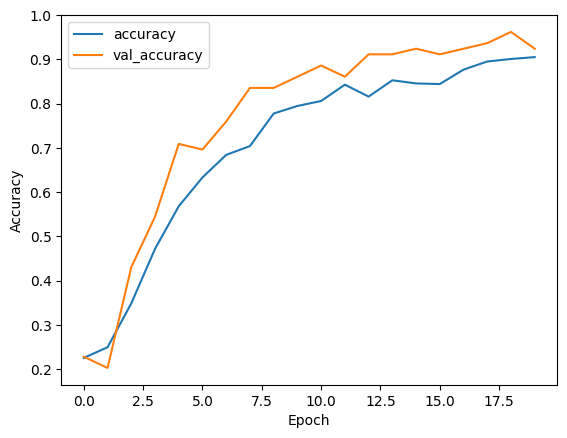

In [16]:
images, labels = load_ck(data_path, emotions)
images, labels = preprocess_data(images, labels)
X_train, X_test, y_train, y_test = split_data(images, labels)
input_shape = (48, 48, 1)
num_classes = len(emotions)

model = build_model(input_shape, num_classes)
history = train_model(model, X_train, y_train, epochs=20, batch_size=32)
accuracy = evaluate_model(model, X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

plot_accuracy(history)

In [53]:
test_image_path = '/content/drive/MyDrive/CK+/disgust/S011_005_00000020.png'
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (48, 48))
test_image = test_image.astype('float32') / 255.0
test_image = np.expand_dims(test_image, axis=-1)  # Expand dimensions to include channels
test_image = np.expand_dims(test_image, axis=0)   # Expand dimensions to include batch size

predictions = model.predict(test_image)

predicted_class = np.argmax(predictions)
predicted_emotion = [emotion for emotion, label in emotions.items() if label == predicted_class][0]

print(f'Predicted Emotion: {predicted_emotion}')

1/1 [==============================] - 0s 28ms/step
Predicted Emotion: disgust


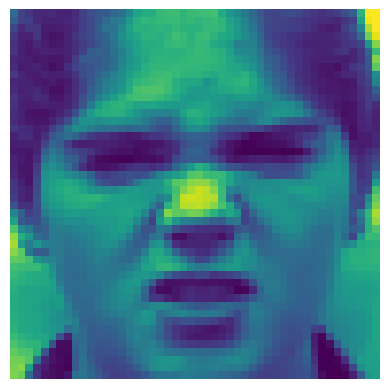

In [54]:
image = Image.open(test_image_path)

plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis
plt.show()

In [31]:
def build_vit_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        # You can implement the Vision Transformer architecture using TensorFlow's layers
        # Here's a simplified example, you may need to adjust it based on your specific requirements
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
def train_model(model, X_train, y_train, epochs, batch_size):
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

In [33]:
def evaluate_model(model, X_test, y_test):
  return model.evaluate(X_test, y_test)

In [34]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [35]:
model = build_vit_model(input_shape, num_classes)
history = train_model(model, X_train, y_train, epochs=20, batch_size=32)
accuracy = evaluate_model(model, X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

Epoch 1/20
23/23 [==============================] - 5s 188ms/step - loss: 1.8710 - accuracy: 0.2408 - val_loss: 1.8079 - val_accuracy: 0.2025
Epoch 2/20
23/23 [==============================] - 5s 208ms/step - loss: 1.7929 - accuracy: 0.3059 - val_loss: 1.7565 - val_accuracy: 0.3924
Epoch 3/20
23/23 [==============================] - 4s 179ms/step - loss: 1.5537 - accuracy: 0.4476 - val_loss: 1.3145 - val_accuracy: 0.4304
Epoch 4/20
23/23 [==============================] - 4s 183ms/step - loss: 1.2470 - accuracy: 0.5326 - val_loss: 0.9561 - val_accuracy: 0.6329
Epoch 5/20
23/23 [==============================] - 5s 212ms/step - loss: 1.0092 - accuracy: 0.5992 - val_loss: 0.7874 - val_accuracy: 0.6709
Epoch 6/20
23/23 [==============================] - 4s 183ms/step - loss: 0.7867 - accuracy: 0.7040 - val_loss: 0.6070 - val_accuracy: 0.8228
Epoch 7/20
23/23 [==============================] - 5s 201ms/step - loss: 0.6792 - accuracy: 0.7422 - val_loss: 0.4937 - val_accuracy: 0.8481
Epoch 

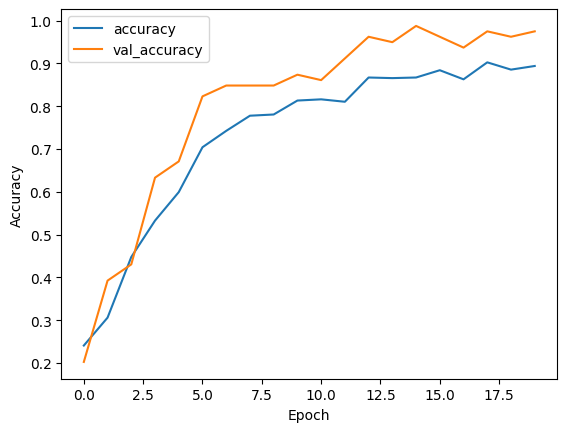

In [36]:
plot_accuracy(history)

In [37]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

for i in range(len(y_pred_classes)):
  if y_pred_classes[i] == y_test_classes[i]:
    print(f"Sample {i}: Predicted: {y_pred_classes[i]}, Actual: {y_test_classes[i]} - Correct Prediction")
  else:
    print(f"Sample {i}: Predicted: {y_pred_classes[i]}, Actual: {y_test_classes[i]} - Incorrect Prediction")

7/7 [==============================] - 1s 66ms/step
Sample 0: Predicted: 6, Actual: 6 - Correct Prediction
Sample 1: Predicted: 6, Actual: 6 - Correct Prediction
Sample 2: Predicted: 5, Actual: 6 - Incorrect Prediction
Sample 3: Predicted: 4, Actual: 4 - Correct Prediction
Sample 4: Predicted: 0, Actual: 0 - Correct Prediction
Sample 5: Predicted: 6, Actual: 6 - Correct Prediction
Sample 6: Predicted: 5, Actual: 5 - Correct Prediction
Sample 7: Predicted: 2, Actual: 2 - Correct Prediction
Sample 8: Predicted: 4, Actual: 4 - Correct Prediction
Sample 9: Predicted: 4, Actual: 4 - Correct Prediction
Sample 10: Predicted: 4, Actual: 4 - Correct Prediction
Sample 11: Predicted: 4, Actual: 4 - Correct Prediction
Sample 12: Predicted: 6, Actual: 6 - Correct Prediction
Sample 13: Predicted: 2, Actual: 2 - Correct Prediction
Sample 14: Predicted: 2, Actual: 2 - Correct Prediction
Sample 15: Predicted: 2, Actual: 2 - Correct Prediction
Sample 16: Predicted: 0, Actual: 0 - Correct Prediction
Samp

1/1 [==============================] - 0s 29ms/step


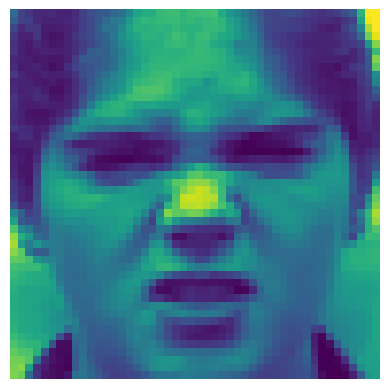

Predicted Emotion: disgust


In [52]:
test_image_path = '/content/drive/MyDrive/CK+/disgust/S011_005_00000020.png'
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (48, 48))
test_image = test_image.astype('float32') / 255.0
test_image = np.expand_dims(test_image, axis=(0, 3))  # Add an additional dimension
predictions = model.predict(test_image)

predicted_class = np.argmax(predictions)
predicted_emotion = [emotion for emotion, label in emotions.items() if label == predicted_class][0]
image = Image.open(test_image_path)

plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis
plt.show()
print(f'Predicted Emotion: {predicted_emotion}')